In [1]:
# Required library installations (uncomment these lines if running in a new environment)
!pip install groq
!pip install pandas
!pip install transformers
!pip install torch
!pip install evaluate
!pip install bert-score
!pip install nltk
!pip install textstat
!pip install rouge_score
!pip install tabulate
!pip install groq
!pip install openpyxl
!pip install matplotlib
!pip install shutil
!pip install datetime
!pip install collections
!pip install fpdf
!pip install random2
!pip install json5
!pip install re
!pip install os-sys
!pip install sentence_transformers
!pip install scikit-learn prettytable termcolor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusol

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
**Test Steps:**

1. Log in to the app and navigate to the Progress Reports section.
2. Verify that the app has successfully synced data from the wearable device or fitness equipment.
3. Wait for the weekly and monthly progress report generation (e.g., at the end of the week/month).
4. Verify that the generated reports include activity levels, workout performance, and goal attainment data.
5. Check that the reports highlight achievements, trends, and areas for improvement.
6. Verify that the app provides personalized recommendations based on the report findings.

**Postconditions:**

* The user can view detailed breakdowns of achievements and trends.
* The app updates the reports in real-time.

**Expected Result:** The app generates accurate weekly and monthly progress reports based on integrated data from wearable devices or fitness equipment, including activity levels, workout performance, and goal attainment.

**Severity:** Critical


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


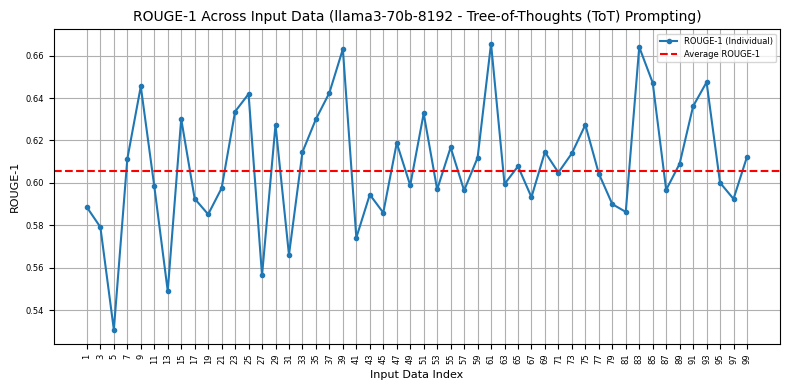

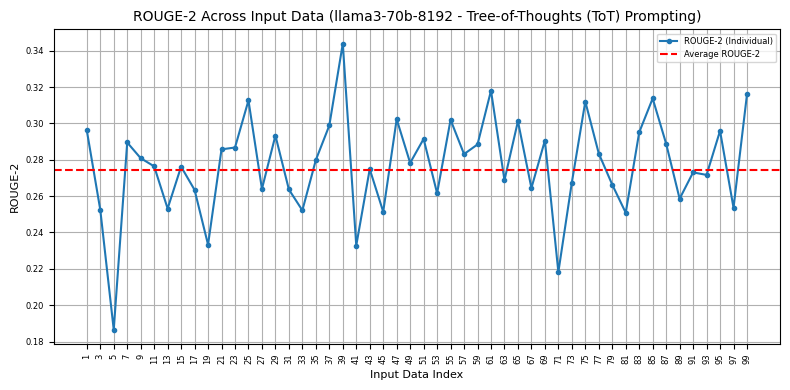

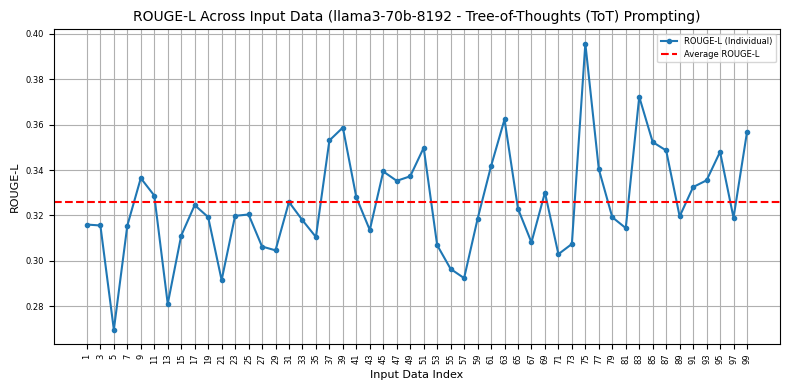

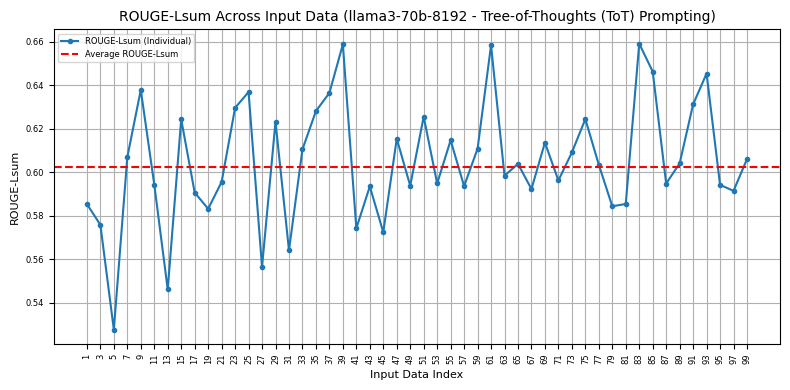

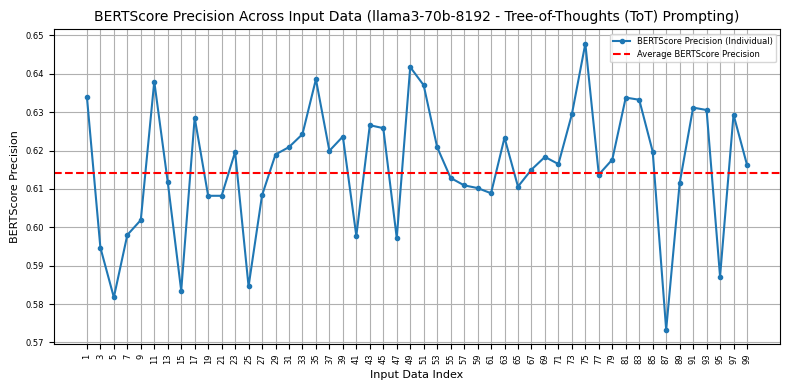

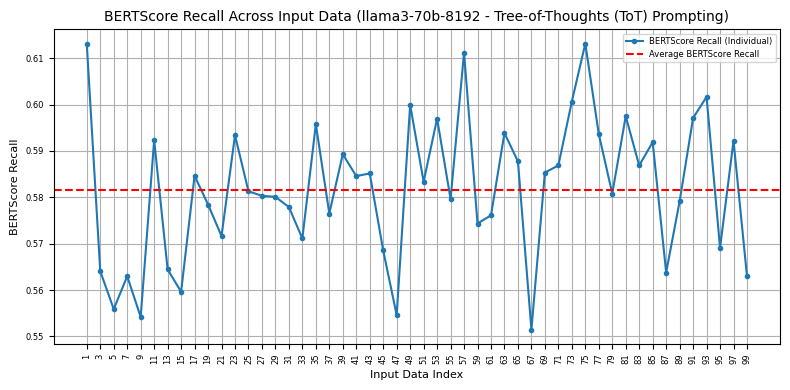

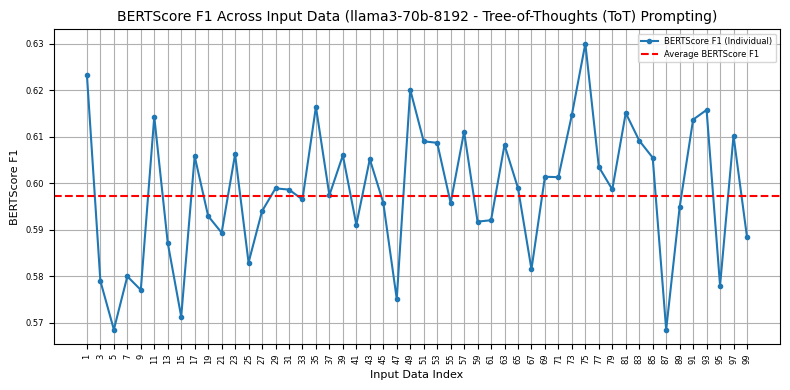

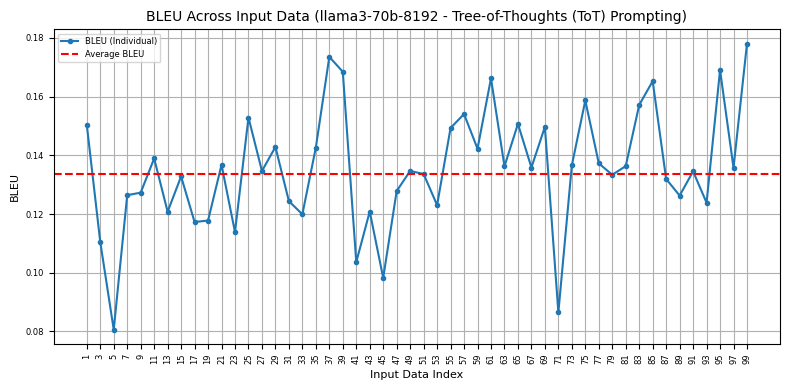

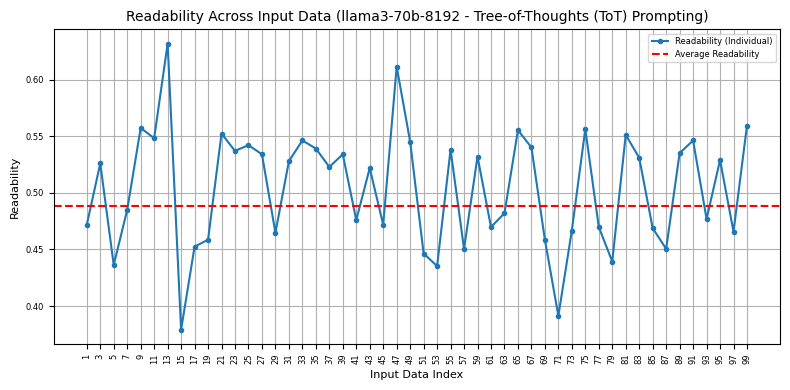

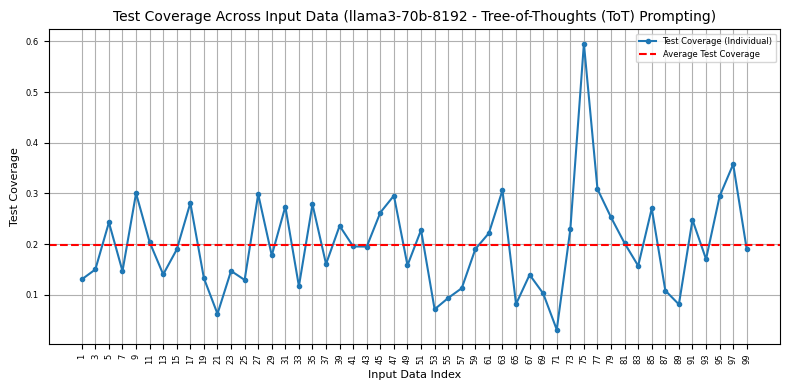

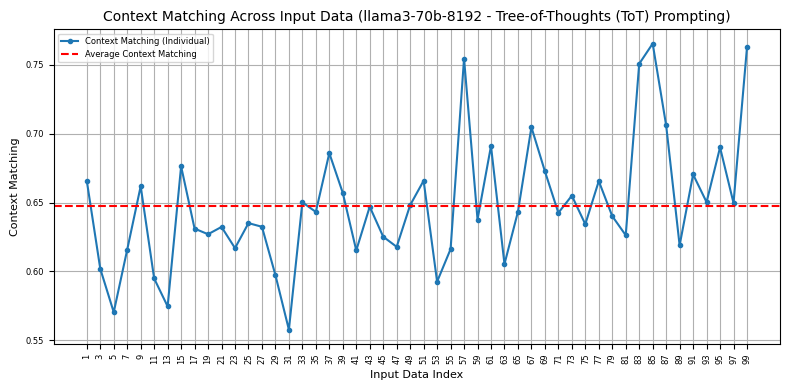

All metrics plotted and saved in images-DJJ33Z


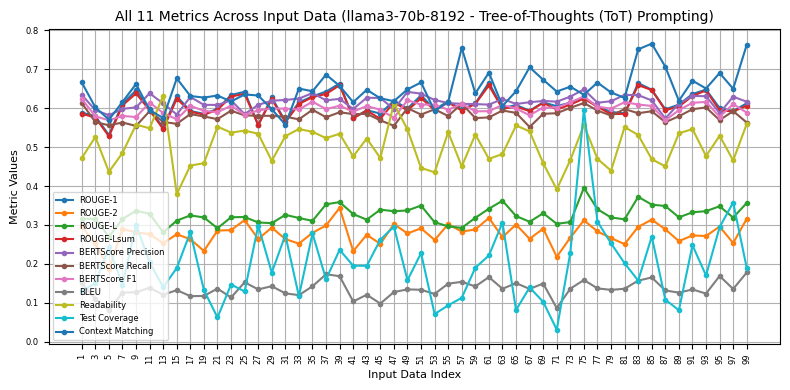

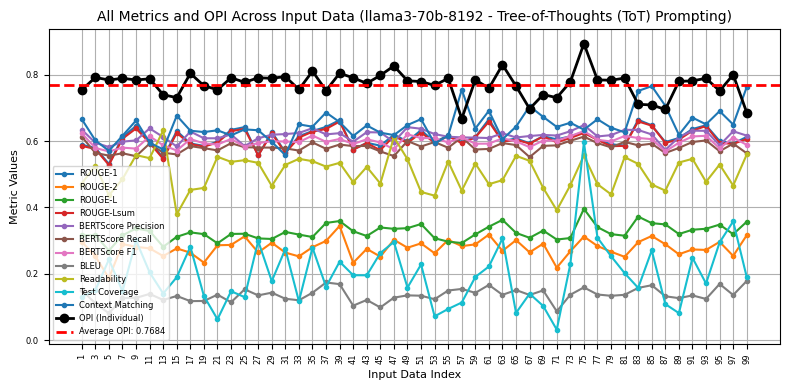

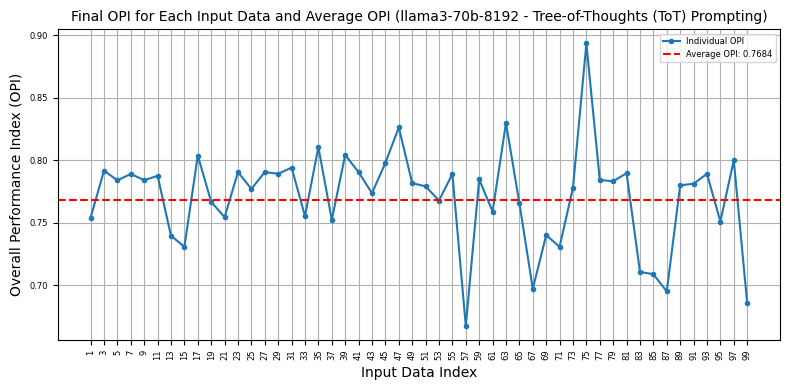

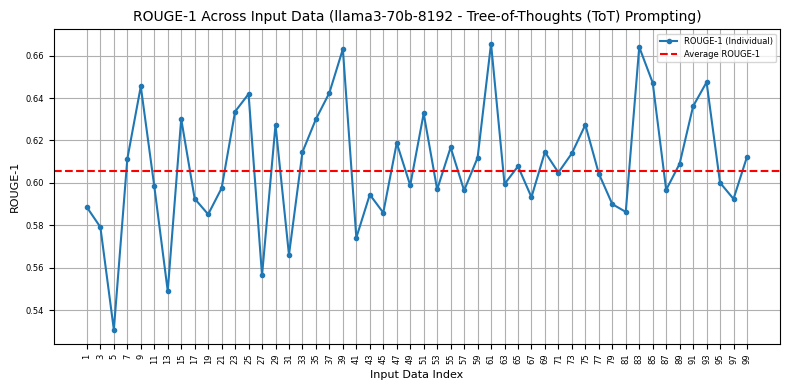

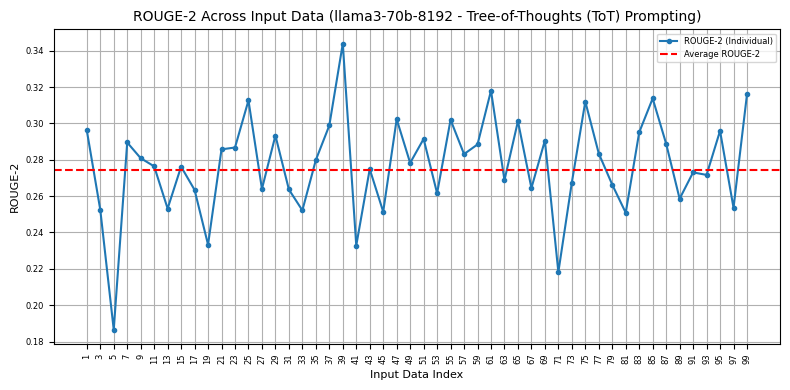

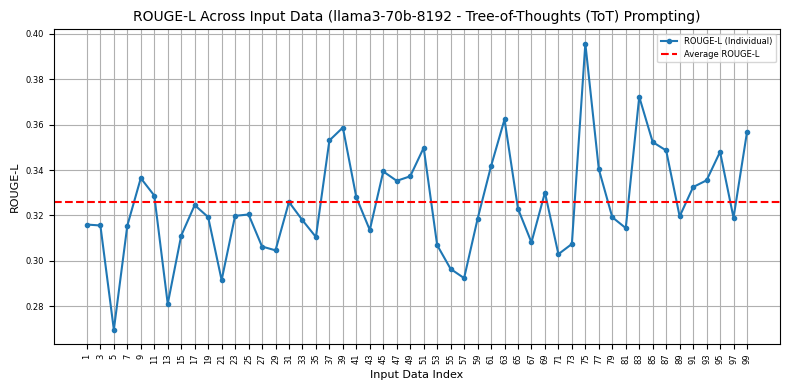

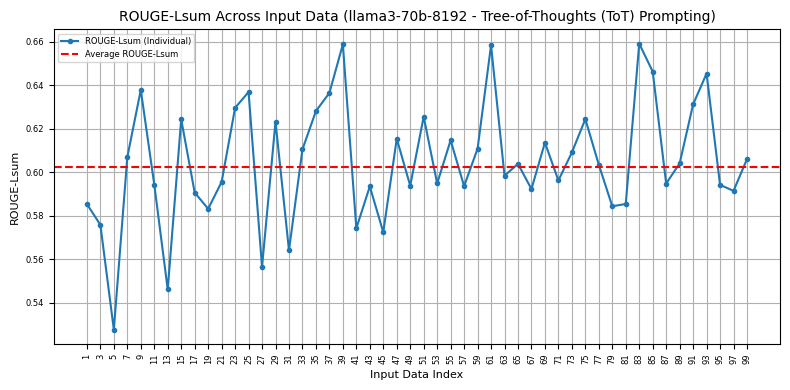

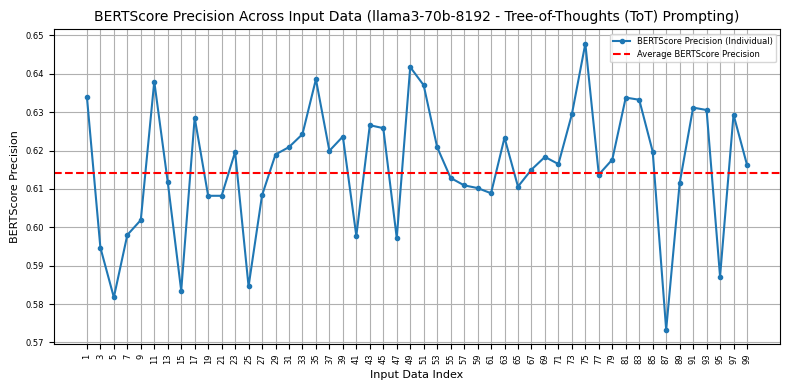

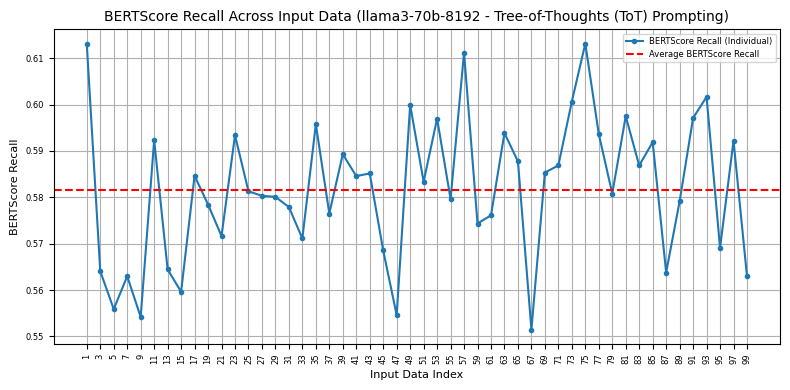

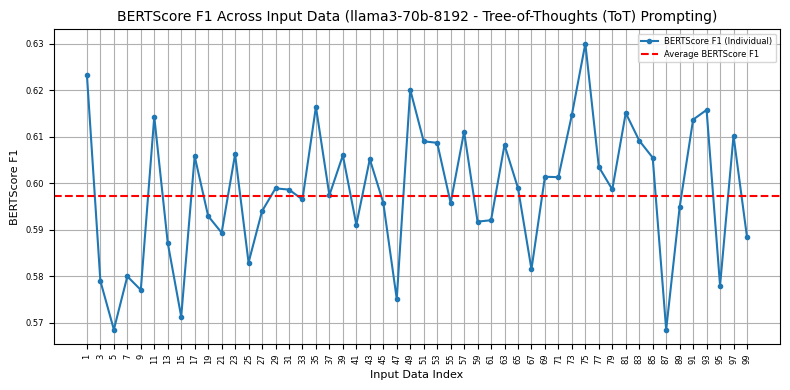

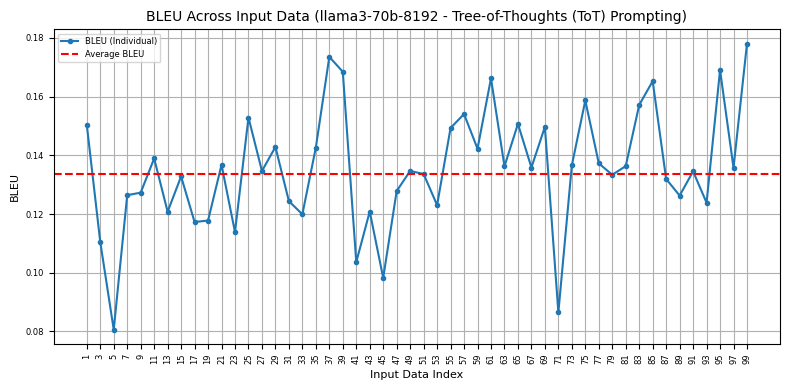

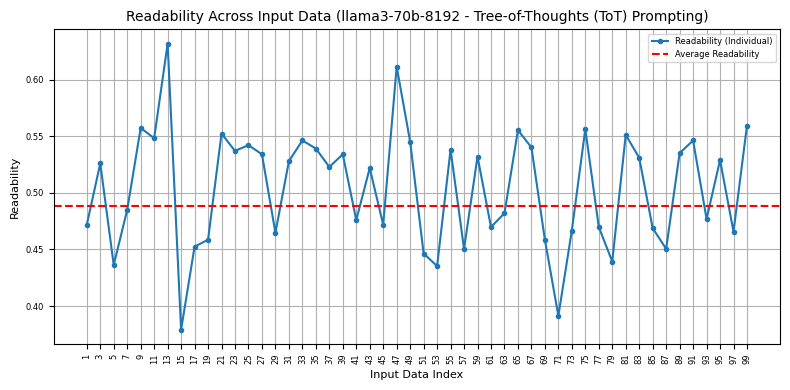

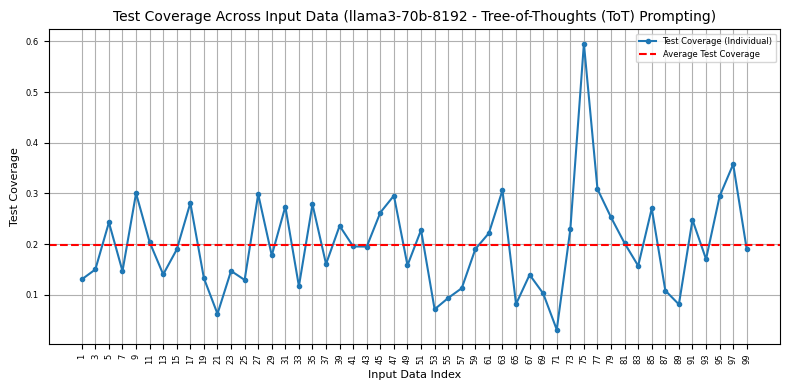

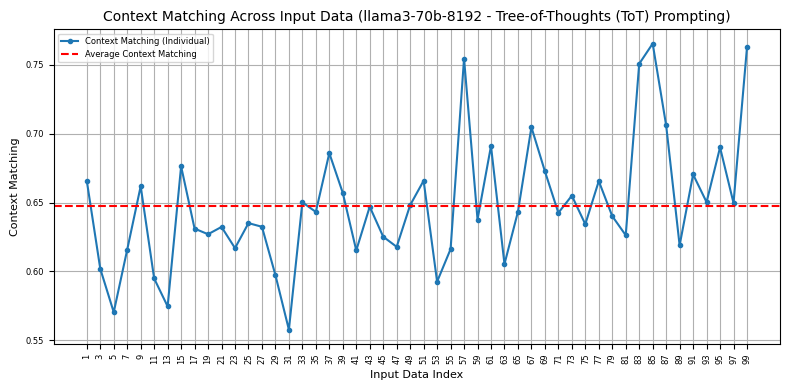

PDF 'P6MG3-llama3-70b-8192-Tree-of-Thoughts (ToT) Prompting-2024-08-17-06-22-PM/Generated_Test_Cases_and_ToT_Logical_Reasoning.pdf' created and saved successfully.
Download your results: P6MG3-llama3-70b-8192-Tree-of-Thoughts (ToT) Prompting-2024-08-17-06-22-PM.zip


/content/P6MG3-llama3-70b-8192-Tree-of-Thoughts (ToT) Prompting-2024-08-17-06-22-PM.zip

In [4]:
import os
import json
import re
import pandas as pd
import random
import string
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from bert_score import score
import textstat
from rouge_score import rouge_scorer
from tabulate import tabulate
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Font
import shutil
import time
from datetime import datetime
from collections import Counter
from fpdf import FPDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from groq import Groq
from nltk.tokenize import word_tokenize
from prettytable import PrettyTable
from termcolor import colored

# Global variables for model name and technique name
MODEL_NAME = "llama3-70b-8192"
TECHNIQUE_NAME = "Tree-of-Thoughts (ToT) Prompting"

# Download the 'punkt' resource from NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Set your Groq API key
os.environ['GROQ_API_KEY'] = 'API_KEY'

# Initialize the Groq client
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

def generate_random_id(length=6):
    """Generate a random alphanumeric ID of given length."""
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=length))

def ordinal(n):
    """Helper function to convert an integer into its ordinal representation."""
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

def extract_field(data, field_variations):
    """Extract the value of a field from data using possible variations."""
    for field in field_variations:
        if field in data:
            return data[field]
    return None

def preprocess_json(json_data):
    """Process JSON data to extract and format relevant fields."""
    result = []
    entry_count = 1

    # Define field variations
    fields = {
        'project_name': ['project_name', 'Project Name', 'projectName', 'ProjectName'],
        'project_description': ['project_description', 'Project Description', 'projectDescription', 'ProjectDescription'],
        'feature_name': ['feature_name', 'Feature Name', 'featureName', 'FeatureName'],
        'feature_description': ['feature_description', 'Feature Description', 'featureDescription', 'FeatureDescription'],
        'userstory_title': ['userstory_title', 'User Story Title', 'userStoryTitle', 'UserStoryTitle'],
        'userstory_acceptance_criteria': ['userstory_acceptance_criteria', 'User Story Acceptance Criteria', 'userStoryAcceptanceCriteria', 'UserStoryAcceptanceCriteria'],
        'test_cases': ['test_cases', 'Test Cases', 'testCases', 'TestCases']
    }

    for entry in json_data:
        project_name = extract_field(entry, fields['project_name'])
        project_description = extract_field(entry, fields['project_description'])
        feature_name = extract_field(entry, fields['feature_name'])
        feature_description = extract_field(entry, fields['feature_description'])
        userstory_title = extract_field(entry, fields['userstory_title'])
        userstory_acceptance_criteria = extract_field(entry, fields['userstory_acceptance_criteria'])
        test_cases = extract_field(entry, fields['test_cases'])

        if not all([project_name, project_description, feature_name, feature_description, userstory_title, userstory_acceptance_criteria, test_cases]):
            continue

        result.append(f"Input Data - {entry_count}")
        result.append(f"1. Project Name - {project_name}")
        result.append(f"2. Project Description - {project_description}")
        result.append(f"3. Feature Name of Project - {feature_name}")
        result.append(f"4. Feature Description of Project - {feature_description}")
        result.append(f"5. User story of Feature - {userstory_title}")

        for i, criteria in enumerate(userstory_acceptance_criteria):
            result.append(f"{i+6}. {ordinal(i + 1)} Criteria of User Story - {criteria}")

        result.append("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
        result.append(f"Reference Test Cases for Input Data - {entry_count}")
        result.append("--------------------------------------------------------------------------------------------------------------------------------------------------------------")

        for j, tc in enumerate(test_cases):
            random_id = generate_random_id()
            result.append(f"Test Case No - {j + 1}")
            result.append(f"Test Case ID: {random_id}")
            result.append(f"Title: {tc['title']}")
            result.append(f"Description: {tc['test_case_description']}")
            result.append(f"Test Suite: {tc['test_suite']}")
            result.append(f"Priority: {tc['test_priority']}")
            result.append(f"Type: {tc['type_of_testing']}")

            result.append("Preconditions:")
            for idx, precondition in enumerate(tc['preconditions'], start=1):
                result.append(f"  {idx}. {precondition}")

            result.append(f"Test Data: {tc['test_data']}")

            result.append("Test Steps:")
            for idx, step in enumerate(tc['test_steps'], start=1):
                result.append(f"  {idx}. {step}")

            result.append("Postconditions:")
            for idx, postcondition in enumerate(tc['postconditions'], start=1):
                result.append(f"  {idx}. {postcondition}")

            result.append(f"Expected Result: {tc['expected_result']}")
            result.append(f"Severity: {tc['severity']}")
            result.append(f"Test Case Behaviour: {tc['test_case_behaviour']}")
            result.append("--------------------------------------------------------------------------------------------------------------------------------------------------------------")

        result.append("======================================================================================================================================================================================================================================================================================================================================")
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
        print(f"JSON Data Extracted Successfully for Input Data - {entry_count}")
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
        entry_count += 1

    return "\n".join(result)

def preprocess_data(file_path):
    """Determine the file type and preprocess the data accordingly."""
    if not os.path.exists(file_path):
        return "File not found. Please provide a valid file path."

    file_extension = os.path.splitext(file_path)[1].lower()

    if file_extension == '.json':
        print("Processing JSON file...")
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            return preprocess_json(json_data)
    else:
        return "Unsupported file format. Please provide a file in JSON format."


def parse_thought_paths(response_content):
    """
    Parse the response to extract individual thought paths along with their names.
    This function returns a list of dictionaries where each dictionary contains the name and content of a thought path.
    """
    thought_paths = []
    # Improved regex pattern to extract both the name and content of each thought path accurately
    path_pattern = re.compile(r"(Thought Path \d+:.*?)(\*\*)(.*?)((?=Thought Path \d+:|$))", re.DOTALL)
    matches = path_pattern.findall(response_content)

    for match in matches:
        # Extract the name and content separately
        thought_name = match[0].split(':', 1)[1].strip()
        thought_content = (match[0] + match[2]).strip()
        thought_paths.append({
            "name": thought_name if thought_name else "Unnamed Thought Path",
            "content": thought_content
        })

    return thought_paths

def evaluate_thought_paths(thought_paths, context, acceptance_criteria):
    """
    Evaluate multiple thought paths based on predefined criteria and select the optimal path.
    """
    print('-'*150)
    print('Multiple Thought Paths enlisted successfully and printed below...')
    print('-'*150)
    for idx, path in enumerate(thought_paths, start=1):
        print(f"Thought Path {idx}:")
        print(path["content"])
    print('-'*150)

    # Define weights for each criterion
    weights = {
        'alignment': 0.25,
        'feasibility': 0.2,
        'completeness': 0.2,
        'consistency': 0.15,
        'edge_cases': 0.1,
        'clarity': 0.1
    }

    def evaluate_alignment(thought_path, context):
        try:
            vectorizer = TfidfVectorizer().fit_transform([thought_path, context])
            tfidf_similarity = cosine_similarity(vectorizer[0:1], vectorizer[1:2])[0][0]
            return tfidf_similarity
        except Exception as e:
            print(f"Error in evaluate_alignment: {e}")
            return 0.0

    def evaluate_feasibility(thought_path):
        try:
            # Extensive list of QA-related illogical phrases
            illogical_phrases = [
                "impossible", "illogical", "contradictory", "cannot happen", "unachievable",
                "ambiguous outcome", "flaky test", "false positive", "false negative", "unhandled edge case",
                "obsolete test case", "test blocked", "unsupported environment", "inconsistent results",
                "unrealistic scenario", "cyclic dependencies", "no test data", "undefined behavior",
                "missing validation", "incomplete scenario", "not feasible", "irrelevant output"
            ]
            feasibility_score = 1.0
            found_phrases = [phrase for phrase in illogical_phrases if phrase in thought_path.lower()]
            if found_phrases:
                reduction_factor = min(len(found_phrases) * 0.1, 0.9)  # Reduce dynamically based on detected phrases
                feasibility_score -= reduction_factor

            return max(feasibility_score, 0.1)  # Ensure feasibility score stays between 0.1 and 1.0
        except Exception as e:
            print(f"Error in evaluate_feasibility: {e}")
            return 0.0

    def evaluate_completeness(thought_path, acceptance_criteria):
        try:
            tokens = word_tokenize(thought_path.lower())
            total_matched = 0
            for criteria in acceptance_criteria:
                matched_tokens = sum(1 for word in word_tokenize(criteria.lower()) if word in tokens)
                if matched_tokens > 0:
                    total_matched += matched_tokens
            completeness_score = total_matched / (len(tokens) + 1)
            return min(completeness_score, 1.0)  # Keep the score between 0 and 1
        except Exception as e:
            print(f"Error in evaluate_completeness: {e}")
            return 0.0

    def evaluate_consistency(thought_path):
        try:
            contradiction_phrases = ["contradict", "inconsistent", "conflict", "paradox", "mutually exclusive"]
            consistency_score = 1.0
            found_phrases = [phrase for phrase in contradiction_phrases if phrase in thought_path.lower()]
            if found_phrases:
                reduction_factor = min(len(found_phrases) * 0.1, 0.9)  # Dynamically reduce score for inconsistencies
                consistency_score -= reduction_factor
            return max(consistency_score, 0.1)  # Ensure consistency score stays between 0.1 and 1.0
        except Exception as e:
            print(f"Error in evaluate_consistency: {e}")
            return 0.0

    def evaluate_edge_cases(thought_path):
        try:
            edge_case_keywords = ["boundary", "limit", "edge", "failure", "exception", "corner case", "extreme condition"]
            total_keywords = len(edge_case_keywords)
            matched_keywords = sum(1 for keyword in edge_case_keywords if keyword in thought_path.lower())
            edge_case_score = matched_keywords / total_keywords if matched_keywords else 0.2  # Assign default low score if none found
            return edge_case_score
        except Exception as e:
            print(f"Error in evaluate_edge_cases: {e}")
            return 0.0

    def evaluate_clarity(thought_path):
        try:
            readability_score = textstat.flesch_reading_ease(thought_path) / 100
            return max(min(readability_score, 1.0), 0.1)  # Ensure the score is between 0.1 and 1.0
        except Exception as e:
            print(f"Error in evaluate_clarity: {e}")
            return 0.0

    scores = []
    for idx, path in enumerate(thought_paths, start=1):
        if not path["content"].strip():
            continue
        path_score = {
            'alignment': evaluate_alignment(path["content"], context),
            'feasibility': evaluate_feasibility(path["content"]),
            'completeness': evaluate_completeness(path["content"], acceptance_criteria),
            'consistency': evaluate_consistency(path["content"]),
            'edge_cases': evaluate_edge_cases(path["content"]),
            'clarity': evaluate_clarity(path["content"])
        }
        total_score = sum(path_score[criterion] * weight for criterion, weight in weights.items())
        scores.append((total_score, path, path_score, idx))

    # Select the thought path with the highest score
    optimal_path = max(scores, key=lambda x: x[0])

    # Generate table output
    table = PrettyTable()
    table.field_names = ["Thought Path", "Alignment", "Feasibility", "Completeness", "Consistency", "Edge Cases", "Clarity", "Total Score", "Name"]

    for score in scores:
        path_number = score[3]
        thought_name = score[1]["name"]
        row = [
            f"Thought Path {path_number}",
            f"{score[2]['alignment']:.2f}",
            f"{score[2]['feasibility']:.2f}",
            f"{score[2]['completeness']:.2f}",
            f"{score[2]['consistency']:.2f}",
            f"{score[2]['edge_cases']:.2f}",
            f"{score[2]['clarity']:.2f}",
            f"{score[0]:.2f}",
            thought_name
        ]

        # Highlight the optimal path without creating a new entry
        if path_number == optimal_path[3]:
            row = [colored(value, 'green', attrs=['bold']) for value in row]

        table.add_row(row)

    print("\nEvaluation Table for Thought Paths:")
    print(table)

    print("\nOptimal Thought Path Selection Details:")
    print(f"Selected Thought Path with Total Score: {optimal_path[0]:.2f}")
    for criterion, score in optimal_path[2].items():
        print(f"{criterion.capitalize()}: {score:.2f}")
    print(f"Name: {optimal_path[1]['name']}")
    print('-'*150)

    # Return the original thought path content without creating a new "Thought Path 6"
    return optimal_path[1]["content"], thought_paths, table

def extract_logical_information(preprocessed_data, entry_count):
    """
    Extract logical reasoning information using Tree-of-Thoughts (ToT) prompting technique with Llama-70B-8192.
    """
    tot_prompt = f"""
    You are an advanced reasoning AI. Based on the given project context, feature details, and acceptance criteria, generate multiple thought paths. For each path, provide logical reasoning information that can be used for test case generation. Divide the thought paths into 5 unordered key points for better decision-making.

    Project Context:

    Project Name: {preprocessed_data['project_name']}
    Project Description: {preprocessed_data['project_description']}
    Feature Name: {preprocessed_data['feature_name']}
    Feature Description: {preprocessed_data['feature_description']}
    User Story Title: {preprocessed_data['userstory_title']}
    Acceptance Criteria: {", ".join(preprocessed_data['acceptance_criteria'])}

    Thought Paths:
    1.
    2.
    3.
    4.
    5.

    Return generated content of 5 Thought Paths
    """

    print('-' * 150)
    print(f"Extracting logical reasoning using ToT for Input Data - {entry_count}...")
    print('-' * 150)

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": tot_prompt,
            }
        ],
        model=MODEL_NAME,
    )
    logical_reasoning = chat_completion.choices[0].message.content
    thought_paths = parse_thought_paths(logical_reasoning)
    optimal_path, thought_paths, evaluation_table = evaluate_thought_paths(thought_paths, preprocessed_data['project_description'], preprocessed_data['acceptance_criteria'])

    print("Optimal Thought Path Selected:")
    print(optimal_path)
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return optimal_path, thought_paths, evaluation_table

def create_prompt(preprocessed_data, logical_reasoning, entry_count, num_test_cases=1, is_optimal=0):
    """
    Create a prompt using preprocessed data, logical reasoning, and context for test case generation.
    The number of test cases to generate can be specified using the `num_test_cases` parameter.
    If `is_optimal=1`, generate 3 test cases based on the optimal logical reasoning thought path;
    otherwise, generate 1 test case for each logical reasoning thought path.

    :param preprocessed_data: Dictionary containing preprocessed project and feature details.
    :param logical_reasoning: The extracted logical reasoning information.
    :param entry_count: Index or entry number for tracking.
    :param num_test_cases: Number of test cases to generate.
    :param is_optimal: Boolean flag to determine if the generation should focus on the optimal path.
    :return: Formatted prompt string for generating test cases.
    """

    # Extract relevant data from preprocessed_data
    project_name = preprocessed_data.get('project_name', 'N/A')
    project_description = preprocessed_data.get('project_description', 'N/A')
    feature_name = preprocessed_data.get('feature_name', 'N/A')
    feature_description = preprocessed_data.get('feature_description', 'N/A')
    userstory_title = preprocessed_data.get('userstory_title', 'N/A')
    acceptance_criteria = ", ".join(preprocessed_data.get('acceptance_criteria', []))

    # Set the number of test cases based on the optimal flag
    if is_optimal == 1:
        num_test_cases = 3

    # Build the prompt for generating test cases
    prompt = f"""
You are functioning as a Quality Assurance Engineer tasked with generating detailed test cases for a software project based on the following input data. Use the provided context and logical reasoning information to structure your test cases effectively.

Project Context:

Project Name: {project_name}
Project Description: {project_description}
Feature Name: {feature_name}
Feature Description: {feature_description}
User Story Title: {userstory_title}
Acceptance Criteria: {acceptance_criteria}

Logical Reasoning Information Extracted:
{logical_reasoning}

Instructions:
Based on the above context details and logical reasoning, generate exactly {num_test_cases} test case(s) that thoroughly cover one or more of the acceptance criteria. Provide clear and concise descriptions for each test case, following the Test Case Creation Template below.

Test Case Creation Template:

Test Case ID: (Provide a unique identifier for each test case)
Test Case Title: (Must start with "Verify that..." and clearly state the feature/function being tested)
Test Case Description: (A brief description of the test case, between 70-100 words)
Test Suite: (Name of the test suite or module)
Test Priority: (Priority level: High, Medium, Low)
Preconditions: (List any prerequisites before executing the test case, max 3 items, in unordered list)
Test Data: (Specify data required for execution; if none, state "No test data needed")
Test Steps: (List steps for executing the test case, min 3 to max 6)
Postconditions: (Any follow-up actions after test execution, max 3 items, in unordered list)
Expected Result: (Overall expected outcome of the test case)
Severity: (Blocker, Critical, Major, Minor, Trivial)
Type of Testing: (Unit Testing, Integration Testing, System Testing, Functional Testing, Non-Functional Testing, Regression Testing, Acceptance Testing, Performance Testing, Load Testing, Stress Testing, End-to-End Testing, Security Testing, Usability Testing, Compatibility Testing, Sanity Testing, Smoke Testing, Exploratory Testing, Ad-Hoc Testing, Data-Driven Testing, Cross-Browser Testing, API Testing, etc.)
Test Case Approach: (Positive, Negative, Destructive)

Objective:
Your objective is to create {num_test_cases} test case(s) that are thorough, cover all specified reasoning points and relevant acceptance criteria, and contribute to a high-quality software product by identifying potential defects early in the development cycle.
    """

    return prompt



def generate_test_cases_with_groq(input_text, entry_count, model_name=MODEL_NAME):
    """Generate test cases using Groq's models."""
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": input_text,
            }
        ],
        model=model_name,
    )
    generated_test_cases = chat_completion.choices[0].message.content
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f"Test Cases Generated Successfully for Input Data -{entry_count}!")
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(generated_test_cases)
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return generated_test_cases

def generate_test_cases_from_input_data(input_data):
    """
    Generate test cases from the input data and compute evaluation metrics.
    This function handles the entire process, from preprocessing the data to generating test cases
    and calculating evaluation metrics.
    """
    # Split the input data into individual entries based on separators
    entries = input_data.split("==================================================================================================================================================================================================================================================================================================")

    # Initialize lists to store results and metrics
    all_metrics = []
    generated_test_cases = []
    reference_test_cases = []
    individual_opis = []
    preprocessed_entries = []
    logical_reasonings = []
    thought_paths = []  # New list to store thought paths
    evaluation_tables = []  # New list to store evaluation tables

    # Generate a random ID for the directory
    random_id = generate_random_id()
    plots_directory = f"images-{random_id}"
    create_plots_directory(plots_directory)

    for entry in entries:
        if not entry.strip():
            continue

        # Extract entry details like project name, feature name, etc.
        entry_count = extract_detail(entry, "Input Data - ")
        if not entry_count:
            continue

        project_name = extract_detail(entry, "Project Name - ")
        project_description = extract_detail(entry, "Project Description - ")
        feature_name = extract_detail(entry, "Feature Name of Project")
        feature_description = extract_detail(entry, "Feature Description of Project")
        user_story_title = extract_detail(entry, "User story of Feature")
        acceptance_criteria = [extract_detail(entry, f"{i + 6}.") for i in range(0, 5)]

        # Extract reference test cases from the input data
        reference_test_case_text = entry.split("Reference Test Cases for Input Data - ")[-1]
        reference_test_cases.append(reference_test_case_text)

        # Preprocess the data for the current entry
        preprocessed_data = {
            "project_name": project_name,
            "project_description": project_description,
            "feature_name": feature_name,
            "feature_description": feature_description,
            "userstory_title": user_story_title,
            "acceptance_criteria": acceptance_criteria
        }

        # Store the preprocessed data as a formatted string
        preprocessed_entry = "\n".join([f"{key.replace('_', ' ').capitalize()} - {value}" for key, value in preprocessed_data.items()])
        preprocessed_entries.append(preprocessed_entry)

        # Extract logical reasoning using ToT
        optimal_path, extracted_thought_paths, eval_table = extract_logical_information(preprocessed_data, entry_count)
        logical_reasonings.append(optimal_path)

        # Store thought paths and evaluation table
        thought_paths.append(extracted_thought_paths)
        evaluation_tables.append(eval_table)

        # Generate 3 test cases for the optimal thought path
        input_text_optimal = create_prompt(preprocessed_data, optimal_path, entry_count, num_test_cases=3,is_optimal=1)
        generated_test_cases_by_llm_optimal = generate_test_cases_with_groq(input_text_optimal, entry_count)
        print('*'*300)
        print(f"For Optimal Thought Path Test cases Generated Successfully-{entry_count}")
        print('*'*300)

        # Generate 1 test case each for the other thought paths
        generated_test_cases_for_others = []
        for path in extracted_thought_paths:
            if path["content"] == optimal_path:
                continue  # Skip the optimal thought path since we already generated 3 test cases for it
            input_text_other = create_prompt(preprocessed_data, path["content"], entry_count, num_test_cases=1,is_optimal=0)
            generated_test_cases_by_llm_other = generate_test_cases_with_groq(input_text_other, entry_count)
            generated_test_cases_for_others.append(generated_test_cases_by_llm_other)
        print('*'*300)
        print(f"For rest of thoughts Path Test cases Generated Successfully-{entry_count}")
        print('*'*300)

        # Combine the generated test cases
        combined_test_cases = (
            generated_test_cases_by_llm_optimal.split('\n')[:3] +  # Select the first 3 test cases from the optimal thought path
            generated_test_cases_for_others  # Add 1 test case from each of the remaining paths
        )

        generated_test_cases.append("\n".join(combined_test_cases))

        # Compute evaluation metrics for the generated test cases
        metrics = compute_evaluation_metrics("\n".join(combined_test_cases), reference_test_case_text, acceptance_criteria)
        all_metrics.append(metrics)

        # Calculate the overall performance index (OPI) for the current entry
        individual_opi = calculate_overall_performance_index(metrics)
        individual_opis.append(individual_opi)

        # Display the metrics for the current entry
        print(f"Metrics for Input Data {entry_count}:")
        headers = ["Metric", "Value"]
        metrics_table = [[metric, value] for metric, value in metrics.items()]
        metrics_table.append(["Final OPI", individual_opi])
        print(tabulate(metrics_table, headers=headers, tablefmt="grid"))
        print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")

    # Calculate average metrics across all input data
    avg_metrics = calculate_average_metrics(all_metrics)
    overall_performance_index = sum(individual_opis) / len(individual_opis)  # Average OPI

    # Display the average metrics and overall performance index
    print("Average Metrics Across All Input Data:")
    headers = ["Metric", "Average Value"]
    avg_metrics_table = [[metric, value] for metric, value in avg_metrics.items()]
    print(tabulate(avg_metrics_table, headers=headers, tablefmt="grid"))
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("Final Average Metrics Across All Input Data:")
    print(avg_metrics)
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Overall Performance Index: {overall_performance_index:.4f}")
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")

    # Save metrics to Excel
    excel_filename = save_metrics_to_excel(all_metrics, avg_metrics, individual_opis, overall_performance_index, MODEL_NAME)

    # Generate and save plots with different sizes
    plot_sizes = [(8, 4)]
    for size in plot_sizes:
        plot_metrics(all_metrics, avg_metrics, plots_directory, size)
        plot_all_metrics_in_one_image(all_metrics, plots_directory, size)
        plot_combined_metrics_with_opi(all_metrics, individual_opis, avg_metrics, overall_performance_index, plots_directory, size)
        plot_final_opi(individual_opis, overall_performance_index, plots_directory, size)
        for metric in all_metrics[0].keys():
            plot_individual_metric(all_metrics, metric, avg_metrics[metric], plots_directory, size)

    # Generate a random 5-digit alphanumeric ID for the folder name
    folder_random_id = generate_random_id(5)

    # Create the final folder name based on model, technique, date, and time
    current_datetime = datetime.now().strftime("%Y-%m-%d-%I-%M-%p")
    final_folder_name = f"{folder_random_id}-{MODEL_NAME}-{TECHNIQUE_NAME}-{current_datetime}"

    os.makedirs(final_folder_name, exist_ok=True)

    # Move the images directory and the Excel file to the final folder
    shutil.move(plots_directory, os.path.join(final_folder_name, plots_directory))
    shutil.move(excel_filename, os.path.join(final_folder_name, excel_filename))

    # Create and save the PDF of generated test cases, thought paths, and evaluation tables
    pdf_file_name = save_test_cases_to_pdf(generated_test_cases, reference_test_cases, preprocessed_entries, final_folder_name, logical_reasonings, thought_paths, evaluation_tables)

    # Zip the final folder
    shutil.make_archive(final_folder_name, 'zip', final_folder_name)

    # If running in a web environment like Jupyter, provide a download link
    try:
        from IPython.display import FileLink
        print(f"Download your results: {final_folder_name}.zip")
        display(FileLink(f"{final_folder_name}.zip"))
    except ImportError:
        print(f"Results saved in folder: {final_folder_name}")

    return generated_test_cases, reference_test_cases, avg_metrics



def compute_evaluation_metrics(generated_text, reference, acceptance_criteria):
    """Compute various evaluation metrics for the generated test cases."""
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
    scores = scorer.score(reference, generated_text)

    rouge_scores = {
        "ROUGE-1": scores['rouge1'].fmeasure,
        "ROUGE-2": scores['rouge2'].fmeasure,
        "ROUGE-L": scores['rougeL'].fmeasure,
        "ROUGE-Lsum": scores['rougeLsum'].fmeasure
    }

    P, R, F1 = score([generated_text], [reference], lang="en", model_type='bert-base-uncased')
    bert_scores = {
        "BERTScore Precision": P.mean().item(),
        "BERTScore Recall": R.mean().item(),
        "BERTScore F1": F1.mean().item()
    }

    reference_tokens = [nltk.word_tokenize(reference)]
    generated_tokens = nltk.word_tokenize(generated_text)
    smoothie = SmoothingFunction().method4
    bleu_score = sentence_bleu(reference_tokens, generated_tokens, smoothing_function=smoothie)

    readability_score = textstat.flesch_reading_ease(generated_text) / 100  # Normalize to 0-1

    context_matching_score = compute_context_matching(reference, generated_text)

    coverage = compute_test_coverage(generated_text, acceptance_criteria)

    return {
        "ROUGE-1": rouge_scores["ROUGE-1"],
        "ROUGE-2": rouge_scores["ROUGE-2"],
        "ROUGE-L": rouge_scores["ROUGE-L"],
        "ROUGE-Lsum": rouge_scores["ROUGE-Lsum"],
        "BERTScore Precision": bert_scores["BERTScore Precision"],
        "BERTScore Recall": bert_scores["BERTScore Recall"],
        "BERTScore F1": bert_scores["BERTScore F1"],
        "BLEU": bleu_score,
        "Readability": readability_score,
        "Test Coverage": coverage,
        "Context Matching": context_matching_score
    }

def compute_context_matching(reference, generated_text):
    """Compute the context matching score between reference and generated text."""
    reference_phrases = reference.split()
    generated_phrases = generated_text.split()
    matched_phrases = [phrase for phrase in reference_phrases if phrase in generated_phrases]
    matching_score = len(matched_phrases) / len(reference_phrases)
    return matching_score

def extract_test_case_titles(generated_text):
    """Extract test case titles from the generated text."""
    title_pattern = re.compile(r"Test Case Title:\s*(.*)")
    return title_pattern.findall(generated_text)

def tokenize_and_remove_stopwords(text):
    """Tokenize the text and remove stopwords."""
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = nltk.word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return filtered_words

def compute_similarity_score(text1, text2):
    """Compute the similarity score between two texts based on common words."""
    words1 = Counter(tokenize_and_remove_stopwords(text1))
    words2 = Counter(tokenize_and_remove_stopwords(text2))
    common_words = sum((words1 & words2).values())
    total_words = max(len(words1), len(words2))
    return common_words / total_words if total_words > 0 else 0

def compute_test_coverage(generated_text, acceptance_criteria):
    """Compute the test coverage score based on acceptance criteria."""
    # Extract test case titles from the generated text
    titles = extract_test_case_titles(generated_text)

    # Compare each acceptance criteria with the corresponding title
    scores = []
    for i, criteria in enumerate(acceptance_criteria):
        if i < len(titles):
            title = titles[i]
            score = compute_similarity_score(title, criteria)
            scores.append(score)

    # Calculate the average coverage score
    coverage = sum(scores) / len(scores) if scores else 0
    return coverage

def calculate_average_metrics(all_metrics):
    """Calculate the average metrics across all input data."""
    metrics_df = pd.DataFrame(all_metrics)
    avg_metrics = metrics_df.mean().to_dict()
    return avg_metrics

def calculate_overall_performance_index(metrics, weights=None):
    """Calculate the overall performance index from the given metrics."""
    if weights is None:
        weights = {
            'ROUGE-1': 0.08,
            'ROUGE-2': 0.08,
            'ROUGE-L': 0.15,
            'ROUGE-Lsum': 0.10,
            'BERTScore Precision': 0.08,
            'BERTScore Recall': 0.16,
            'BERTScore F1': 0.10,
            'BLEU': 0.03,
            'Readability': 0.03,
            'Test Coverage': 0.12,
            'Context Matching': 0.12
        }

    normalized_metrics = {metric: metrics[metric] / max(metrics.values()) for metric in metrics.keys()}
    overall_score = sum(normalized_metrics[metric] * weight for metric, weight in weights.items())
    return overall_score

def extract_detail(text, keyword):
    """Extract specific details from text based on a given keyword."""
    lines = text.split("\n")
    for line in lines:
        if keyword in line:
            detail = line.split("- ")[-1].strip()
            # Attempt to convert to integer, handling potential float strings
            try:
                return int(float(detail))  # Convert to float first, then to integer
            except ValueError:
                return detail  # Return the original string if not convertible
    return ''

def create_plots_directory(directory):
    """Create a directory for saving plots."""
    if not os.path.exists(directory):
        os.makedirs(directory)

def plot_metrics(all_metrics, avg_metrics, directory, fig_size):
    """Plot the metrics for analysis with subsampling on the X-axis."""
    metrics_df = pd.DataFrame(all_metrics)

    # List of metrics to plot
    rouge_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
    bert_metrics = ['BERTScore Precision', 'BERTScore Recall', 'BERTScore F1']
    other_metrics = ['BLEU', 'Readability', 'Test Coverage', 'Context Matching']

    # Calculate the number of input data indices
    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)

    # Generate a list of indices starting from 1 with the calculated step size
    x_indices = list(range(1, num_indices + 1, step_size))

    # Plot each metric individually
    for metric in rouge_metrics + bert_metrics + other_metrics:
        plt.figure(figsize=fig_size)
        plt.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=f'{metric} (Individual)')
        plt.axhline(y=avg_metrics[metric], color='r', linestyle='--', label=f'Average {metric}')
        plt.title(f'{metric} Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
        plt.xlabel('Input Data Index', fontsize=8)
        plt.ylabel(f'{metric}', fontsize=8)
        plt.xticks(x_indices, rotation=90, fontsize=6)
        plt.yticks(fontsize=6)
        plt.legend(fontsize=6)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(directory, f"{metric}_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
        plt.show()

    print(f"All metrics plotted and saved in {directory}")

def plot_all_metrics_in_one_image(all_metrics, directory, fig_size):
    """Plot all 11 metrics in one image, excluding final OPI."""
    metrics_df = pd.DataFrame(all_metrics)

    # List of metrics to plot
    all_metrics_list = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum',
                        'BERTScore Precision', 'BERTScore Recall', 'BERTScore F1',
                        'BLEU', 'Readability', 'Test Coverage', 'Context Matching']

    # Calculate the number of input data indices
    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)

    # Generate a list of indices starting from 1 with the calculated step size
    x_indices = list(range(1, num_indices + 1, step_size))

    # Plot all metrics in one image
    fig, ax = plt.subplots(figsize=fig_size)  # Use the provided figure size
    for metric in all_metrics_list:
        ax.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=metric)
    ax.set_title(f'All 11 Metrics Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    ax.set_xlabel('Input Data Index', fontsize=8)
    ax.set_ylabel('Metric Values', fontsize=8)
    ax.legend(loc='best', fontsize=6)
    ax.grid(True)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"All_Metrics_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()

def plot_combined_metrics_with_opi(all_metrics, individual_opis, avg_metrics, overall_performance_index, directory, fig_size):
    """Plot all metrics and OPI together in one image with subsampling."""
    metrics_df = pd.DataFrame(all_metrics)

    # List of metrics to plot
    all_metrics_list = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum',
                        'BERTScore Precision', 'BERTScore Recall', 'BERTScore F1',
                        'BLEU', 'Readability', 'Test Coverage', 'Context Matching']

    # Calculate the number of input data indices
    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)

    # Generate a list of indices starting from 1 with the calculated step size
    x_indices = list(range(1, num_indices + 1, step_size))

    # Plot all metrics and OPI in one image
    fig, ax = plt.subplots(figsize=fig_size)  # Use the provided figure size
    for metric in all_metrics_list:
        ax.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=metric)
    ax.plot(x_indices, individual_opis[::step_size], marker='o', color='black', label='OPI (Individual)', linewidth=2)
    ax.axhline(y=overall_performance_index, color='red', linestyle='--', label=f'Average OPI: {overall_performance_index:.4f}', linewidth=2)
    ax.set_title(f'All Metrics and OPI Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    ax.set_xlabel('Input Data Index', fontsize=8)
    ax.set_ylabel('Metric Values', fontsize=8)
    ax.legend(loc='best', fontsize=6)
    ax.grid(True)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"Combined_Metrics_and_OPI_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()

def plot_final_opi(individual_opis, overall_performance_index, directory, fig_size):
    """Plot the final OPI for each input data and the average OPI."""
    num_inputs = len(individual_opis)
    step_size = determine_step_size(num_inputs)

    x_indices = list(range(1, num_inputs + 1, step_size))

    plt.figure(figsize=fig_size)
    plt.plot(x_indices, individual_opis[::step_size], marker='o', markersize=3, label='Individual OPI')
    plt.axhline(y=overall_performance_index, color='red', linestyle='--', label=f'Average OPI: {overall_performance_index:.4f}')
    plt.title(f'Final OPI for Each Input Data and Average OPI ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    plt.xlabel('Input Data Index', fontsize=10)
    plt.ylabel('Overall Performance Index (OPI)', fontsize=10)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.legend(fontsize=6)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"Final_OPI_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()

def plot_individual_metric(all_metrics, metric, avg_metric, directory, fig_size):
    """Plot an individual metric with average line."""
    metrics_df = pd.DataFrame(all_metrics)

    num_indices = len(metrics_df)
    step_size = determine_step_size(num_indices)
    x_indices = list(range(1, num_indices + 1, step_size))

    plt.figure(figsize=fig_size)
    plt.plot(x_indices, metrics_df[metric].iloc[::step_size], marker='o', markersize=3, label=f'{metric} (Individual)')
    plt.axhline(y=avg_metric, color='r', linestyle='--', label=f'Average {metric}')
    plt.title(f'{metric} Across Input Data ({MODEL_NAME} - {TECHNIQUE_NAME})', fontsize=10)
    plt.xlabel('Input Data Index', fontsize=8)
    plt.ylabel(f'{metric}', fontsize=8)
    plt.xticks(x_indices, rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.legend(fontsize=6)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f"{metric}_{fig_size[0]}x{fig_size[1]}.png"), dpi=300)
    plt.show()

def determine_step_size(num_indices):
    """Determine step size for x-axis labels based on number of data points."""
    if num_indices <= 50:
        return 1
    elif num_indices <= 100:
        return 2
    elif num_indices <= 300:
        return 5
    elif num_indices <= 500:
        return 10
    else:
        return max(1, num_indices // 100)

def save_metrics_to_excel(all_metrics, avg_metrics, individual_opis, overall_performance_index, model_name):
    """Save all metrics, average metrics, individual OPIs, and average OPI to an Excel file."""
    workbook = Workbook()
    sheet_title = f"Tree of Thoughts(TOT) Prompting - {model_name}"
    sheet = workbook.active
    sheet.title = sheet_title

    # Define header
    header = ["Input Data No."] + list(all_metrics[0].keys()) + ["Individual OPI"]
    sheet.append(header)

    # Apply formatting to header
    header_fill = PatternFill(start_color="ADD8E6", end_color="ADD8E6", fill_type="solid")
    header_font = Font(bold=True)
    for cell in sheet[1]:
        cell.fill = header_fill
        cell.font = header_font

    # Add data
    for i, (metrics, opi) in enumerate(zip(all_metrics, individual_opis), start=1):
        row = [i] + list(metrics.values()) + [opi]
        sheet.append(row)

    # Add average metrics and average OPI
    avg_row = ["Average"] + list(avg_metrics.values()) + [overall_performance_index]
    sheet.append(avg_row)

    # Apply formatting to average row
    avg_fill = PatternFill(start_color="FFFF99", end_color="FFFF99", fill_type="solid")
    avg_font = Font(bold=True)
    for cell in sheet[len(all_metrics) + 2]:
        cell.fill = avg_fill
        cell.font = avg_font

    # Save the workbook with a random ID in the filename
    random_id = generate_random_id()
    file_name = f"metrics_{random_id}.xlsx"
    workbook.save(file_name)
    print(f"Excel sheet '{file_name}' created and downloaded successfully.")
    return file_name

def save_test_cases_to_pdf(generated_test_cases, reference_test_cases, preprocessed_data, final_folder_name, logical_reasonings, thought_paths, evaluation_tables):
    """
    Save the generated test cases, reference input data, preprocessed data, ToT logical reasoning, thought paths,
    and evaluation tables into a PDF file. The PDF content is formatted professionally with proper spacing and font styles.
    """
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Set title font
    pdf.set_font("Times", 'B', 14)
    pdf.set_text_color(0, 0, 0)

    # Title
    title_text = f"Generated Test Cases via {MODEL_NAME} LLM Model and {TECHNIQUE_NAME} Technique"
    pdf.cell(0, 10, title_text, ln=True, align='C')
    pdf.line(10, 26, 200, 26)  # Underline
    pdf.ln(10)  # Add some vertical space

    # Loop through the generated test cases, reference test cases, preprocessed data, logical reasoning, thought paths, and evaluation tables
    for i, (gen_case, ref_case, pre_data, logical_reasoning, thought_path, eval_table) in enumerate(zip(generated_test_cases, reference_test_cases, preprocessed_data, logical_reasonings, thought_paths, evaluation_tables), start=1):
        # Section Header
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, f"Data - {i}", ln=True, align='L')
        pdf.ln(5)

        # Preprocessed Data
        pdf.set_font("Times", '', 12)
        for line in pre_data.splitlines():
            if " - " in line:
                key, value = line.split(" - ", 1)
                pdf.set_font("Times", 'B', 12)
                pdf.multi_cell(0, 10, f"{key} - ", align='L')
                pdf.set_font("Times", '', 12)
                pdf.multi_cell(0, 10, value, align='L')
            else:
                pdf.multi_cell(0, 10, line, align='L')
        pdf.ln(5)

        # ToT Logical Reasoning Header
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, "ToT Logical Reasoning:", ln=True, align='L')
        pdf.ln(5)

        # ToT Logical Reasoning Content
        pdf.set_font("Times", '', 12)
        pdf.multi_cell(0, 10, logical_reasoning.encode('latin1', 'replace').decode('latin1'), align='L')
        pdf.ln(5)

        # Thought Paths Header
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, "Thought Paths and Evaluations:", ln=True, align='L')
        pdf.ln(5)

        # Thought Paths Content
        pdf.set_font("Times", '', 12)
        for thought in thought_path:
            pdf.multi_cell(0, 10, thought["content"].encode('latin1', 'replace').decode('latin1'), align='L')
            pdf.ln(5)

        # Evaluation Table
        pdf.set_font("Times", 'B', 12)
        pdf.multi_cell(0, 10, eval_table.get_string(), align='L')
        pdf.ln(5)

        # Generated Test Cases Header
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, "Generated Test Cases:", ln=True, align='L')
        pdf.ln(5)

        # Generated Test Cases Content
        pdf.set_font("Times", '', 12)
        pdf.multi_cell(0, 10, gen_case.encode('latin1', 'replace').decode('latin1'), align='L')
        pdf.ln(5)

        # Divider for each data section
        pdf.set_font("Times", 'B', 12)
        pdf.cell(0, 10, "-" * 100, ln=True, align='C')
        pdf.ln(5)

    # Save the PDF directly to the final folder
    pdf_file_name = os.path.join(final_folder_name, "Generated_Test_Cases_and_ToT_Logical_Reasoning.pdf")
    pdf.output(pdf_file_name)
    print(f"PDF '{pdf_file_name}' created and saved successfully.")

    return pdf_file_name


# Example usage with the extracted input data from the previous step
file_path = 'data100.json'  # Replace 'datas.json' with the path to your JSON or CSV file
input_data = preprocess_data(file_path)
generated_test_cases, reference_test_cases, avg_metrics = generate_test_cases_from_input_data(input_data)
